ME1/1 ME1/2 2/X   3/X   4/X
5680, 6860, 7910, 9115, 10020 (mm)
5.68  6.86  7.91  9.115 10.020




z*tan(theta)*cos(phi)

In [1]:
import PIL

from numpy import log, tan, cos, sin, arctan
from math import pi, sqrt

from scipy.interpolate import interp1d
from scipy.interpolate import Rbf

import sys
sys.path.append('./custom_modules/') 
import module1 as md
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
!cat configs/filepath.txt
X, y = md.load_input_file("/uscms_data/d3/mkim/MKWorkingArea/CMSSW_10_2_0/src/JL/Melrose/P2_CMSSW_10_1_5/src/L1TMuonSimulations/Analyzers/test7/histos_tba.20.npz")

fnal cmslpc computer cluster

/uscms_data/d3/mkim/MKWorkingArea/CMSSW_10_2_0/src/JL/Melrose/P2_CMSSW_10_1_5/src/L1TMuonSimulations/Analyzers/test7/histos_tba.20.npz
<class 'numpy.lib.npyio.NpzFile'>
['variables', 'parameters']


In [2]:
z11 = 5.68
z12 = 6.86
z20 = 6.86
z30 = 7.91
z40 = 10.020

In [3]:
# X2 is (m, f1, f2) m sample size, f1 station number, f2 phi, theta
X0=X.astype(float) 
X1 = X0.copy()
X1[:,:,0] = X0[:,:,0]*(1./16)*(pi/180)
X2 = X1.copy()
X2[:,:,1] = (X1[:,:,1]*1./4+10)*(pi/180)

# (m, station 1: x,y,z, station2: x, y, z, ....)
X_xyz = np.zeros((X2.shape[0],12),dtype='float')

# x for station 1,2,3,4
i_s = 0
X_xyz[:,0+4*i_s] = z11*tan(X2[:,0,1])*cos(X2[:,0,0])
X_xyz[:,1+4*i_s] = z20*tan(X2[:,1,1])*cos(X2[:,1,0])
X_xyz[:,2+4*i_s] = z30*tan(X2[:,2,1])*cos(X2[:,2,0])
X_xyz[:,3+4*i_s] = z40*tan(X2[:,3,1])*cos(X2[:,3,0])
# y for station 1,2,3,4
i_s = 1
X_xyz[:,0+4*i_s] = z11*tan(X2[:,0,1])*sin(X2[:,0,0])
X_xyz[:,1+4*i_s] = z20*tan(X2[:,1,1])*sin(X2[:,1,0])
X_xyz[:,2+4*i_s] = z30*tan(X2[:,2,1])*sin(X2[:,2,0])
X_xyz[:,3+4*i_s] = z40*tan(X2[:,3,1])*sin(X2[:,3,0])
# z for station 1,2,3,4
i_s = 2
X_xyz[:,0+4*i_s] = z11
X_xyz[:,1+4*i_s] = z20
X_xyz[:,2+4*i_s] = z30
X_xyz[:,3+4*i_s] = z40

In [6]:
%matplotlib inline

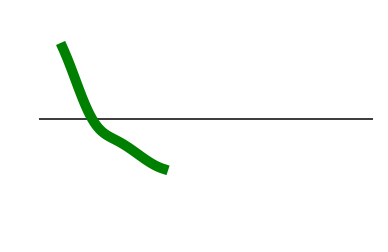

In [22]:
# process all samples
#for i in range(1):
i = 2
# find center of mass
x_com = np.mean(X_xyz[i,0:4])
y_com = np.mean(X_xyz[i,0+4:4+4])
# find rotation angle
if x_com >= 0:
    rotang = arctan(y_com/x_com)
elif x_com < 0:
    rotang = arctan(y_com/x_com) + pi
# rotate (x, y)
rot_x = cos(rotang)*X_xyz[i,0:4]+sin(rotang)*X_xyz[i,0+4:4+4]
rot_y = -sin(rotang)*X_xyz[i,0:4]+cos(rotang)*X_xyz[i,0+4:4+4]
pt = round(1/y[i,0],1)
#plt.text(2,0.55, "pt: %s GeV"%pt, fontsize=12)
#plt.xlabel("x (M)")
#plt.ylabel("y (M)")
plt.hlines(0,-5,5)
plt.xlim(1,4)
plt.ylim(-0.5,0.5)
plt.axis('off')
rbf = Rbf(rot_x, rot_y)
xi = np.linspace(min(rot_x), max(rot_x), 101)
fi = rbf(xi)
plt.plot(rot_x, rot_y, 'bo')
plt.plot(xi, fi, 'g', linewidth=10)
plt.savefig("./imgs/im_xy_%d"%i+".jpg", dpi=10, bbox_inches='tight')
if i % 1000 == 0:
    print(i)
#plt.clf()

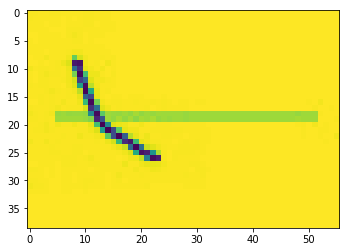

In [23]:
img = PIL.Image.open("./imgs/im_xy_%d"%i+".jpg").convert("L")
imgarr = np.array(img)

plt.imshow(imgarr)

In [ ]:
for i in range(0,X2.shape[0]):
    #if (1/y[i,0]) < 15: continue
    #if (1/y[i,0]) > 20: continue
    #print("i :",i,1/y[i,0] )
    phi11 = X2[i,0,0]
    tht11 = X2[i,0,1]
    
    phi20 = X2[i,1,0]
    tht20 = X2[i,1,1]
    
    phi30 = X2[i,2,0]
    tht30 = X2[i,2,1]
    
    phi40 = X2[i,3,0]
    tht40 = X2[i,3,1]
    pt = round(1/y[i,0],1)
    #print("pt: ",pt)
    l_x = [z11*tan(tht11)*cos(phi11), z20*tan(tht20)*cos(phi20), z30*tan(tht30)*cos(phi30), z40*tan(tht40)*cos(phi40)]
    l_y = [z11*tan(tht11)*sin(phi11), z20*tan(tht20)*sin(phi20), z30*tan(tht30)*sin(phi30), z40*tan(tht40)*sin(phi40)]
    l_z = [z11, z20, z30, z40]
    
    
    
    #plt.scatter(l_x,l_y)
    #plt.text(2,4, "pt: %s GeV"%pt, fontsize=12)
    #plt.xlabel("x (M)")
    #plt.ylabel("y (M)")
    #plt.hlines(0,-5,5)
    #plt.vlines(0,-5,5)
    #plt.xlim(-5,5)
    #plt.ylim(-5,5)
    ##print("pt: ",1/y[i,0])
    #plt.savefig("im_xy_%d"%i)
    #plt.clf()
    #
    #plt.scatter(l_z, l_x)
    #plt.text(7,4, "pt: %s GeV"%pt, fontsize=12)
    #plt.xlabel("z (M)")
    #plt.ylabel("x (M)")
    #plt.hlines(0,0,10)
    #plt.xlim(0,10)
    #plt.ylim(-5,5)
    #plt.savefig("im_zx_%d"%i)
    #plt.clf()
    #
    #plt.scatter(l_z, l_y)
    #plt.text(7,4, "pt: %s GeV"%pt, fontsize=12)
    #plt.xlabel("z (M)")
    #plt.ylabel("y (M)")
    #plt.hlines(0,0,10)
    #plt.xlim(0,10)
    #plt.ylim(-5,5)
    #plt.savefig("im_zy_%d"%i)
    #plt.clf()

In [ ]:
i=711
print("i :",i,1/y[i,0] )
phi11 = X2[i,0,0]
tht11 = X2[i,0,1]

phi20 = X2[i,1,0]
tht20 = X2[i,1,1]

phi30 = X2[i,2,0]
tht30 = X2[i,2,1]

phi40 = X2[i,3,0]
tht40 = X2[i,3,1]
pt = round(1/y[i,0],1)
#print("pt: ",pt)
l_x = [z11*tan(tht11)*cos(phi11), z20*tan(tht20)*cos(phi20), z30*tan(tht30)*cos(phi30), z40*tan(tht40)*cos(phi40)]
l_y = [z11*tan(tht11)*sin(phi11), z20*tan(tht20)*sin(phi20), z30*tan(tht30)*sin(phi30), z40*tan(tht40)*sin(phi40)]
l_z = [z11, z20, z30, z40]


plt.scatter(l_x,l_y)
plt.text(2,4, "pt: %s GeV"%pt, fontsize=12)
plt.xlabel("x (M)")
plt.ylabel("y (M)")
plt.hlines(0,-5,5)
plt.vlines(0,-5,5)
plt.xlim(-5,5)
plt.ylim(-5,5)
#print("pt: ",1/y[i,0])
plt.savefig("im_xy_%d"%i)
plt.clf()

plt.scatter(l_z, l_x)
plt.text(7,4, "pt: %s GeV"%pt, fontsize=12)
plt.xlabel("z (M)")
plt.ylabel("x (M)")
plt.hlines(0,0,10)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.savefig("im_zx_%d"%i)
plt.clf()

plt.scatter(l_z, l_y)
plt.text(7,4, "pt: %s GeV"%pt, fontsize=12)
plt.xlabel("z (M)")
plt.ylabel("y (M)")
plt.hlines(0,0,10)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.savefig("im_zy_%d"%i)
plt.clf()

print(1/y[i,0])
print(l_x)
print(l_y)
sumu = 0
for i in range(4):
    sumu += sqrt(l_x[0]**2+l_y[0]**2)
print(sumu/4)

In [ ]:
X2

In [ ]:
np.max(X[:,:,0]*1/16)

In [ ]:
np.min(X[:,:,0]*1/16)

In [ ]:
th_offset = 10

i=20

print(y[i,2])
print(-log(tan((np.max(X[i,:,1]*1./4+th_offset)/2)*(pi/180))))
print(-log(tan((np.min(X[i,:,1]*1./4+th_offset)/2)*(pi/180))))

In [ ]:
np.max(X[i,:,1]*1./4+th_offset)

In [ ]:
np.min(X[i,:,1]*1./4+th_offset)

In [ ]:
from math import pi

from numpy import log, tan

-log(tan((np.max(X[i,:,1]*1./4+th_offset)/2)*(pi/180)))

In [ ]:
-log(tan((np.min(X[i,:,1]*1./4+th_offset)/2)*(pi/180)))

In [ ]:
X[0,0,0]*(1./16)

In [ ]:
X[0,0,1]*(1./4)